In [17]:
import pandas as pd
import glob
from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np

for mu in [0.01,0.001,0.0001]:
    for gap in [5,10,25,45,60,100]:
        directory_path = '../data/fitlands2_initoption0_extremeoption1_samplenum10_plasticoption0_gengap'+str(gap)+'_mu'+str(mu)+'_generations10000_Npop100/'

        # Define the column for which you want to calculate the mean
        column_names = ['meanfitness', 'seqscommon', 'seqstarget','extreme0', 'extreme1', 'other']
        column_mean = defaultdict(list)
        for column_name in column_names:
            
            csv_files = glob.glob(directory_path + '*.csv')

            dfs = []

            for file in csv_files:
                df = pd.read_csv(file)
                dfs.append(df[column_name])

            concatenated_df = pd.concat(dfs, axis=1)
            for i in range(0,10000):
                column_mean[column_name].append(concatenated_df.iloc[i].mean())
            
        dfmean = pd.DataFrame(column_mean)
        dfmean.to_csv(directory_path+'meandata.csv')

In [7]:
import pandas as pd
import glob
from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np

for mu in [0.01,0.001,0.0001]:
    for gap in [5,10,25,45,60,100]:
        directory_path = '../data/fitlands2_initoption0_extremeoption0_samplenum10_plasticoption0_gengap'+str(gap)+'_mu'+str(mu)+'_generations10000_Npop100/'

        # Define the column for which you want to calculate the mean
        column_names = ['meanfitness', 'seqscommon', 'seqstarget','extreme0', 'extreme1', 'other']
        column_mean = defaultdict(list)
        for column_name in column_names:
            
            csv_files = glob.glob(directory_path + '*.csv')

            dfs = []

            for file in csv_files:
                df = pd.read_csv(file)
                dfs.append(df[column_name])

            concatenated_df = pd.concat(dfs, axis=1)
            for i in range(0,10000):
                column_mean[column_name].append(concatenated_df.iloc[i].mean())
            
        dfmean = pd.DataFrame(column_mean)
        dfmean.to_csv(directory_path+'meandata.csv')

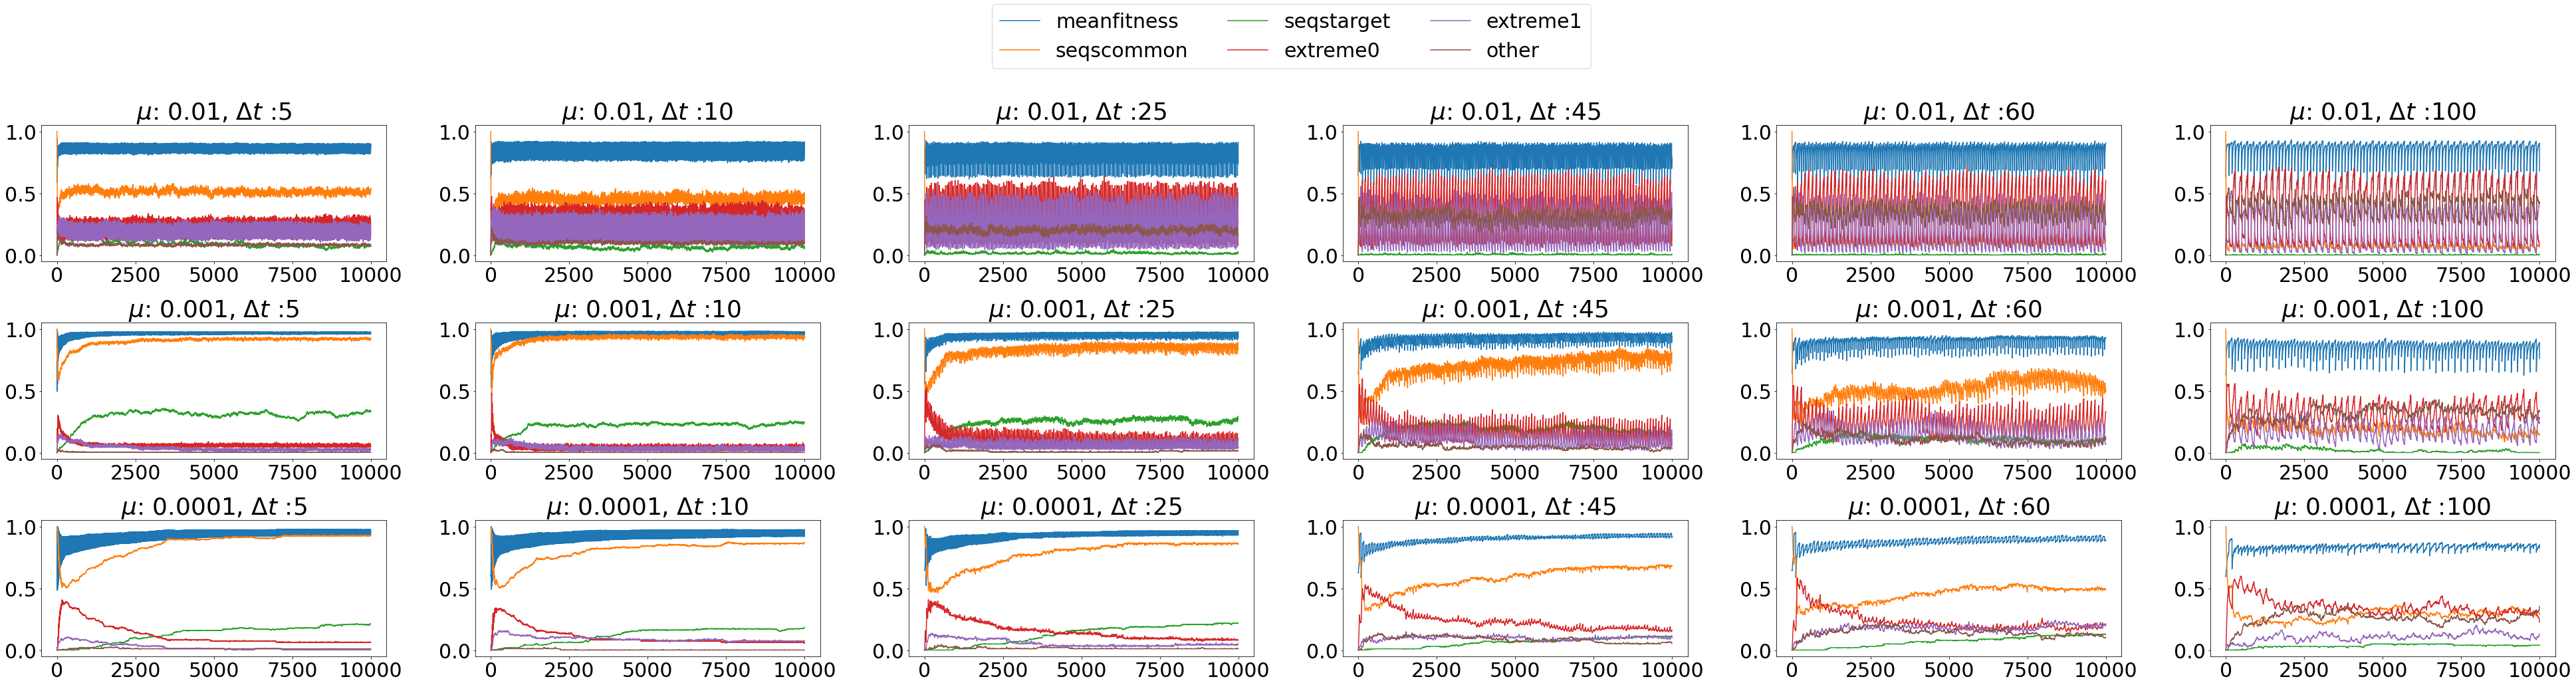

In [53]:
import pandas as pd
import glob
from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np
#mpl.rcParams['agg.path.chunksize'] = 10000
fig, ax = plt.subplots(3, 6,figsize=(55,13))
plt.rcParams.update({'font.size':30})
fig.tight_layout(pad = 1.5)
countrow = -1
# Path to the directory containing your CSV files
for mu in [0.01,0.001,0.0001]:
    countrow+=1
    countcol = -1
    for gap in [5,10,25,45,60,100]:
        countcol+=1
        directory_path = '../data/fitlands2_initoption0_extremeoption1_samplenum10_plasticoption0_gengap'+str(gap)+'_mu'+str(mu)+'_generations10000_Npop100/'
        df = pd.read_csv(directory_path + 'meandata.csv')

        # Define the column for which you want to calculate the mean
        column_names = ['meanfitness', 'seqscommon', 'seqstarget','extreme0', 'extreme1', 'other']
        
        for column_name in column_names:
            ax[countrow,countcol].plot(np.arange(1,10001),df[column_name][0:10000], label=column_name)
            ax[countrow,countcol].set_title(r'$\mu$: ' + str(mu) + r', $\Delta t$ :' + str(gap))
            
handles, labels = ax[2,5].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center',bbox_to_anchor = (0, 0.15, 1, 1),ncol=3,bbox_transform = plt.gcf().transFigure)
fig.savefig('seqsevodyn.png',bbox_inches='tight')

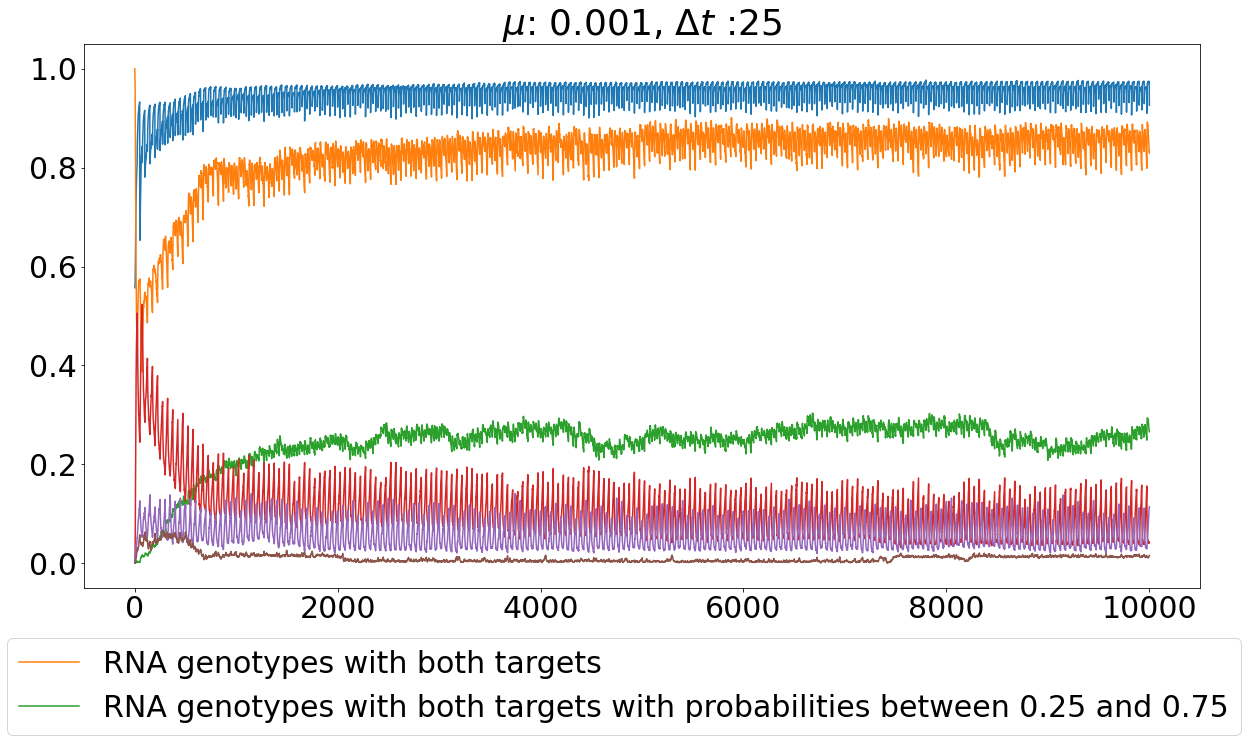

In [66]:
fig, ax = plt.subplots(figsize=(20, 10))
gap = 100
mu = 0.001
directory_path = '../data/fitlands2_initoption0_extremeoption1_samplenum10_plasticoption0_gengap'+str(gap)+'_mu'+str(mu)+'_generations10000_Npop100/'
df = pd.read_csv(directory_path + 'meandata.csv')
column_names = ['meanfitness', 'seqscommon', 'seqstarget','extreme0', 'extreme1', 'other']
for column_name in column_names:
        if column_name == 'seqscommon':
                ax.plot(np.arange(1,10001),df[column_name][0:10000], label='RNA genotypes with both targets')
        elif column_name == 'seqstarget':
                ax.plot(np.arange(1,10001),df[column_name][0:10000],label='RNA genotypes with both targets with probabilities between 0.25 and 0.75')
        else: 
                ax.plot(np.arange(1,10001),df[column_name][0:10000])

ax.set_title(r'$\mu$: ' + str(mu) + r', $\Delta t$ :' + str(gap))        
fig.legend(loc='lower center',bbox_to_anchor = (0, -0.1, 1, 1),ncol=1,bbox_transform = plt.gcf().transFigure)

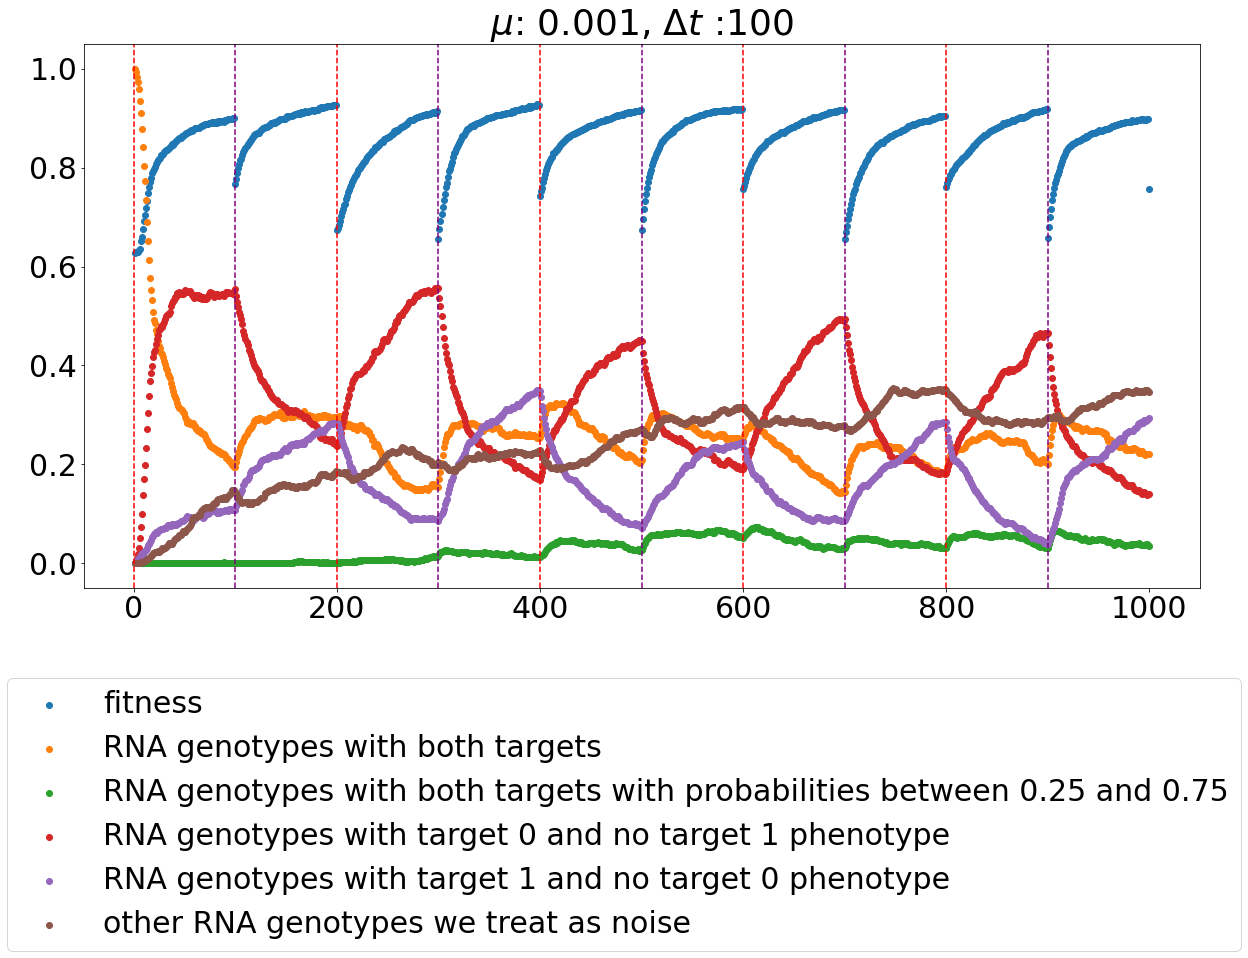

In [93]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

fig, ax = plt.subplots(figsize=(20, 10))
gap = 100
mu = 0.001
rangex_value = 1000  # Renamed rangex to avoid conflict
directory_path = '../data/fitlands2_initoption0_extremeoption1_samplenum10_plasticoption0_gengap'+str(gap)+'_mu'+str(mu)+'_generations10000_Npop100/'
df = pd.read_csv(directory_path + 'meandata.csv')
column_names = ['meanfitness', 'seqscommon', 'seqstarget','extreme0', 'extreme1', 'other']
for column_name in column_names:
        if column_name == 'seqscommon':
                ax.scatter(np.arange(1, rangex_value + 1), df[column_name][0:rangex_value], label='RNA genotypes with both targets')
        elif column_name == 'seqstarget':
                ax.scatter(np.arange(1, rangex_value + 1), df[column_name][0:rangex_value], label='RNA genotypes with both targets with probabilities between 0.25 and 0.75')
        elif column_name == 'extreme0':
                ax.scatter(np.arange(1, rangex_value + 1), df[column_name][0:rangex_value], label='RNA genotypes with target 0 and no target 1 phenotype')
        elif column_name == 'extreme1':
                ax.scatter(np.arange(1, rangex_value + 1), df[column_name][0:rangex_value], label='RNA genotypes with target 1 and no target 0 phenotype')
        elif column_name == 'other' : 
                ax.scatter(np.arange(1, rangex_value + 1), df[column_name][0:rangex_value], label='other RNA genotypes we treat as noise' )
        else: 
                ax.scatter(np.arange(1, rangex_value + 1), df[column_name][0:rangex_value], label='fitness')

for i in range(0, rangex_value, gap*2):
    ax.axvline(x=i, color='red', linestyle='--')

for i in range(gap, rangex_value, gap*2):
    ax.axvline(x=i, color='purple', linestyle='--')

# Concatenate mu and gap into the title
title = r'$\mu$: ' + str(mu) + r', $\Delta t$ :' + str(gap)
ax.set_title(title)

# Add legend
fig.legend(loc='lower center', bbox_to_anchor=(0, -0.4, 1, 1), ncol=1, bbox_transform=plt.gcf().transFigure)

# Save the plot
fig.savefig('seqsevodyn-closeup100.png', bbox_inches='tight')


In [85]:
clear range

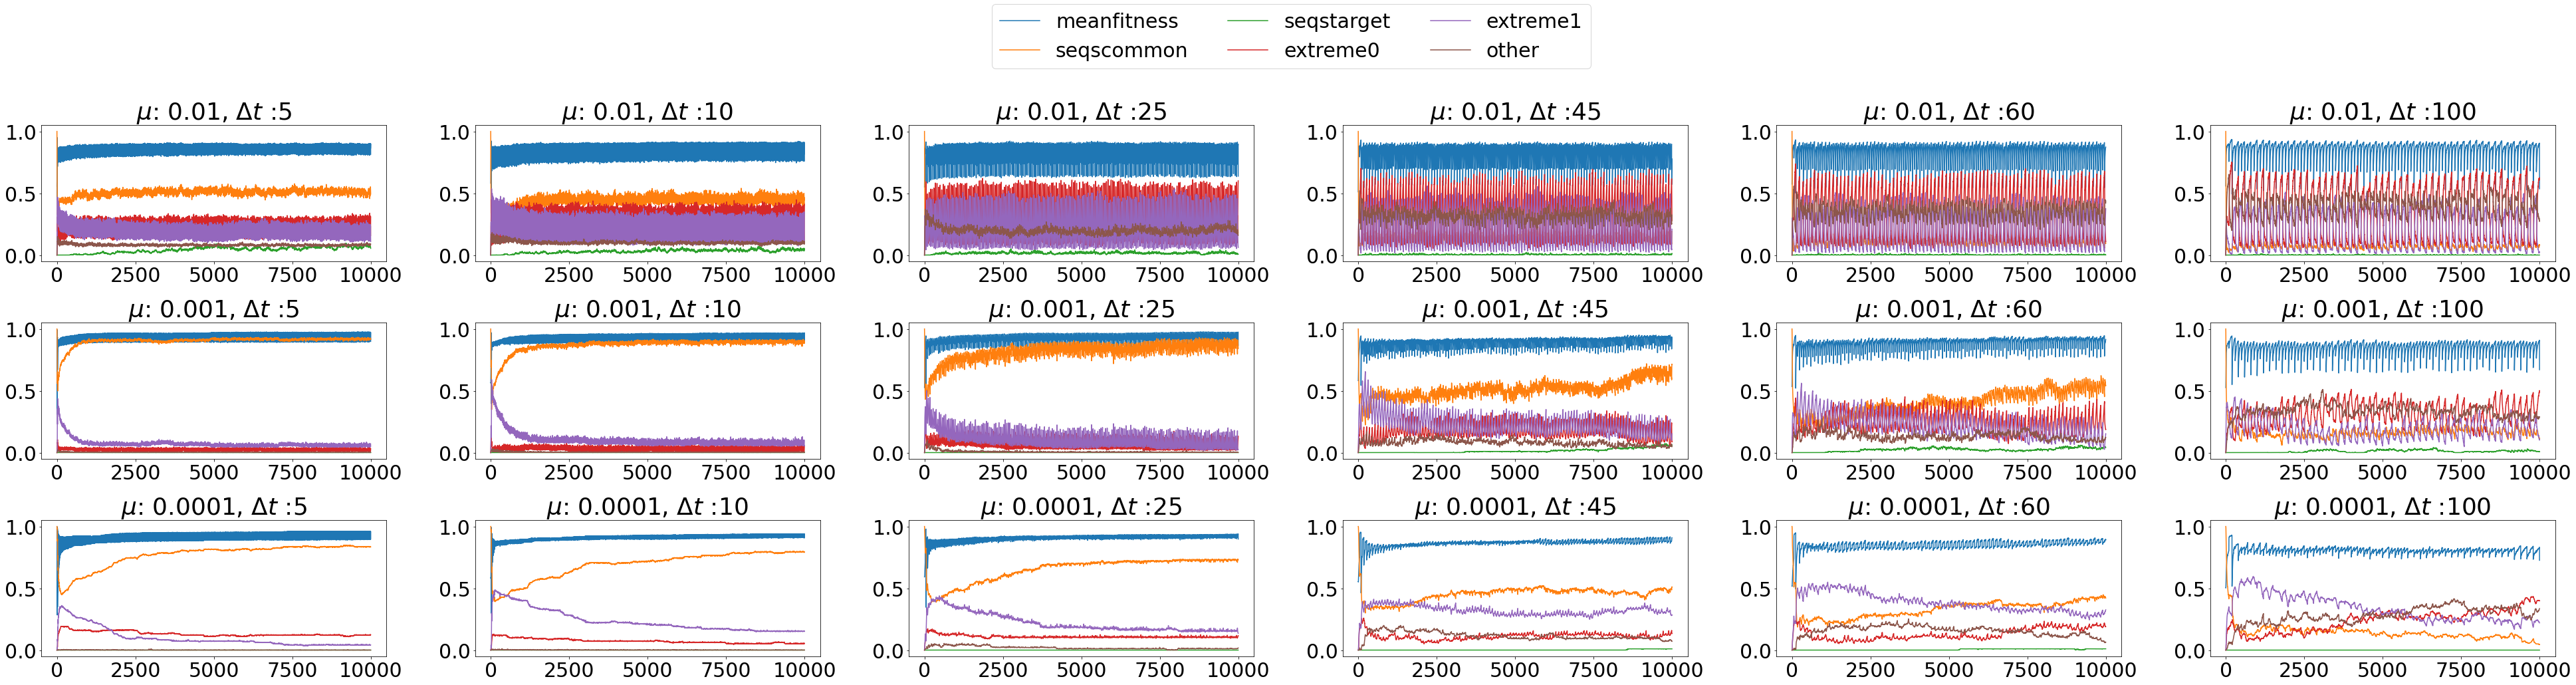

In [94]:
import pandas as pd
import glob
from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np
#mpl.rcParams['agg.path.chunksize'] = 10000
fig, ax = plt.subplots(3, 6,figsize=(55,13))
plt.rcParams.update({'font.size':30})
fig.tight_layout(pad = 1.5)
countrow = -1
# Path to the directory containing your CSV files
for mu in [0.01,0.001,0.0001]:
    countrow+=1
    countcol = -1
    for gap in [5,10,25,45,60,100]:
        countcol+=1
        directory_path = '../data/fitlands2_initoption0_extremeoption0_samplenum10_plasticoption0_gengap'+str(gap)+'_mu'+str(mu)+'_generations10000_Npop100/'
        df = pd.read_csv(directory_path + 'meandata.csv')

        # Define the column for which you want to calculate the mean
        column_names = ['meanfitness', 'seqscommon', 'seqstarget','extreme0', 'extreme1', 'other']
        
        for column_name in column_names:
            ax[countrow,countcol].plot(np.arange(1,10001),df[column_name][0:10000], label=column_name)
            ax[countrow,countcol].set_title(r'$\mu$: ' + str(mu) + r', $\Delta t$ :' + str(gap))
            
handles, labels = ax[2,4].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center',bbox_to_anchor = (0, 0.15, 1, 1),ncol=3,bbox_transform = plt.gcf().transFigure)
fig.savefig('seqsevodyn0.png',bbox_inches='tight')

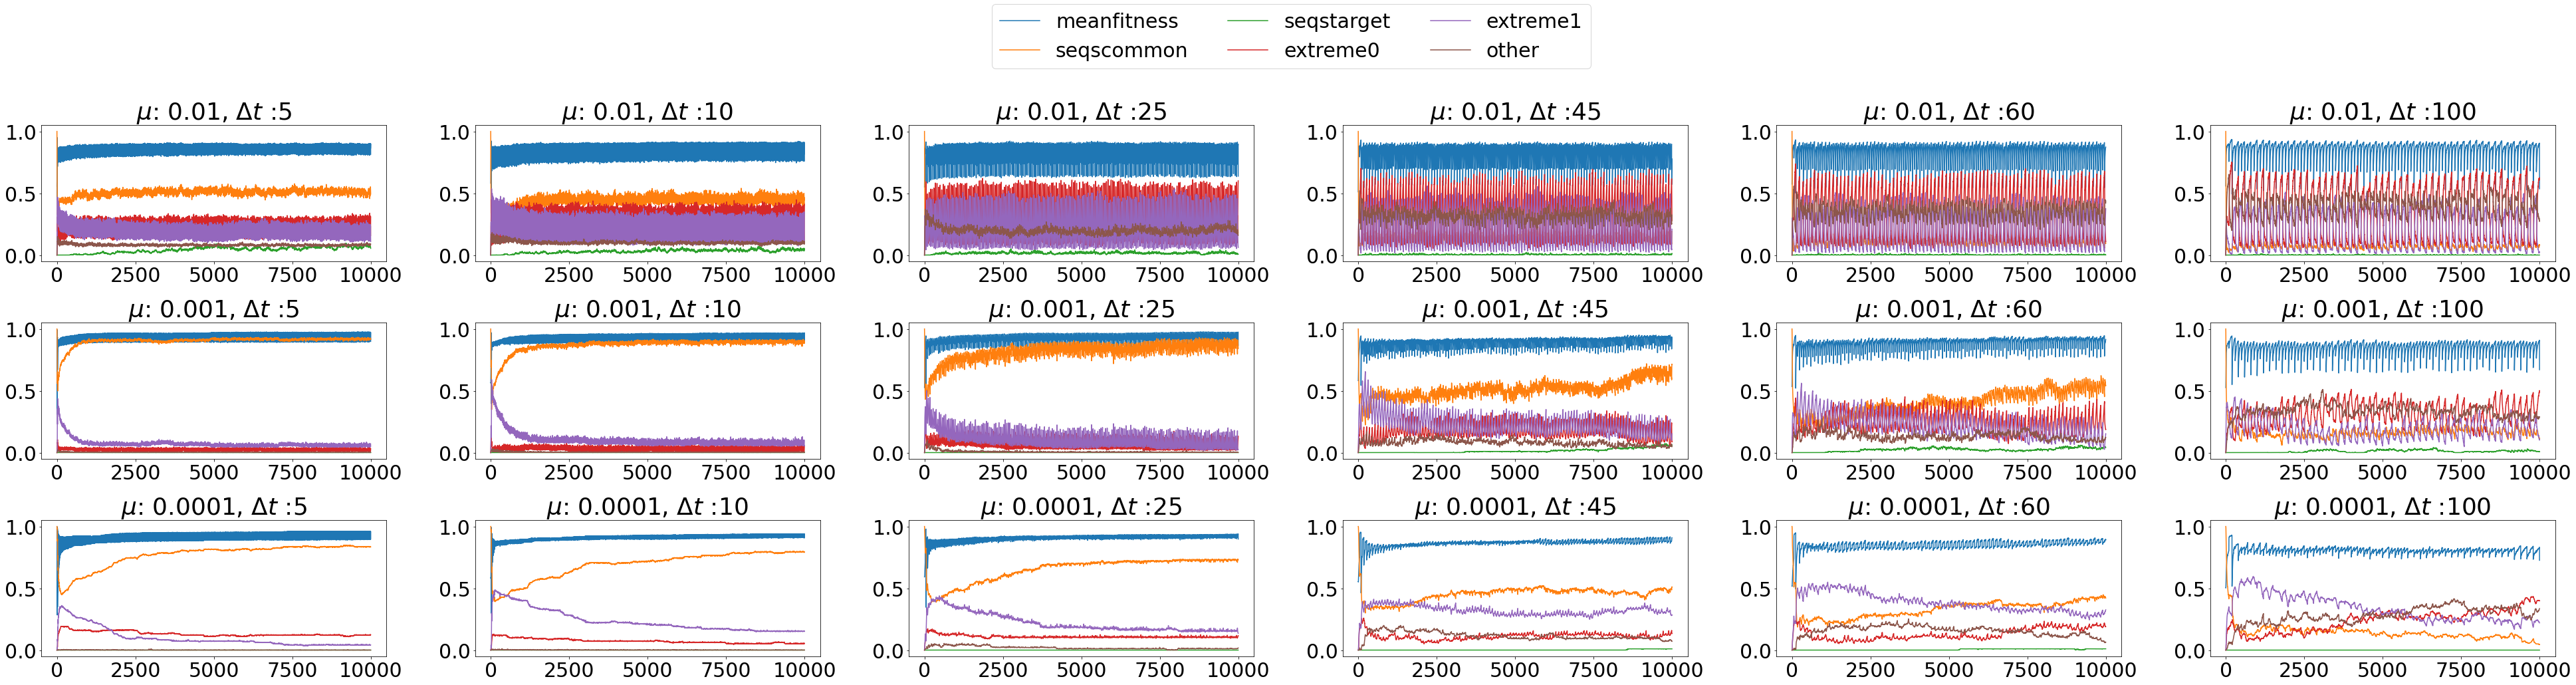

In [11]:
import pandas as pd
import glob
from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np
#mpl.rcParams['agg.path.chunksize'] = 10000
fig, ax = plt.subplots(3, 6,figsize=(55,13))
plt.rcParams.update({'font.size':30})
fig.tight_layout(pad = 1.5)
countrow = -1
# Path to the directory containing your CSV files
for mu in [0.01,0.001,0.0001]:
    countrow+=1
    countcol = -1
    for gap in [5,10,25,45,60,100]:
        countcol+=1
        directory_path = '../data/fitlands2_initoption0_extremeoption0_samplenum10_plasticoption0_gengap'+str(gap)+'_mu'+str(mu)+'_generations10000_Npop100/'
        df = pd.read_csv(directory_path + 'meandata.csv')

        # Define the column for which you want to calculate the mean
        column_names = ['meanfitness', 'seqscommon', 'seqstarget','extreme0', 'extreme1', 'other']
        
        for column_name in column_names:
            ax[countrow,countcol].plot(np.arange(1,10001),df[column_name][0:10000], label=column_name)
            ax[countrow,countcol].set_title(r'$\mu$: ' + str(mu) + r', $\Delta t$ :' + str(gap))
            
handles, labels = ax[2,4].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center',bbox_to_anchor = (0, 0.15, 1, 1),ncol=3,bbox_transform = plt.gcf().transFigure)
fig.savefig('seqsevodyn0.png',bbox_inches='tight')

In [30]:
#regimes plot
from scipy.interpolate import interp1d
from scipy.integrate import simps
import numpy as np

sum_seqscommonandtar = 0
sum_other_three = 0
regime ={}
for mu in [0.01,0.001,0.0001]:
    for gap in [5,10,25,45,60,100]:
        directory_path = '../data/fitlands2_initoption0_extremeoption1_samplenum10_plasticoption0_gengap'+str(gap)+'_mu'+str(mu)+'_generations10000_Npop100/'
        df = pd.read_csv(directory_path + 'meandata.csv')
        column_names = ['meanfitness', 'seqscommon', 'seqstarget','extreme0', 'extreme1', 'other']
        x = df.iloc[:, 0]
        dictintegral = defaultdict(float)
        for name in column_names:
            y = df[name]
            sort_indices = np.argsort(x)
            x_sorted = x[sort_indices]
            y_sorted = y[sort_indices]
            f = interp1d(x_sorted, y_sorted, kind='linear')
            x_interp = np.linspace(min(x_sorted), max(x_sorted), 1000)
            y_interp = f(x_interp)
            integral = simps(y_interp, x_interp)
            dictintegral[name] = integral

        sum_seqscommonandtar = dictintegral['seqscommon'] + dictintegral['seqstarget']
        sum_other_three =  dictintegral['extreme0'] + dictintegral['extreme1'] + dictintegral['other']
 
        if sum_seqscommonandtar > sum_other_three:
            regime[(mu,gap)] = 1
        elif sum_seqscommonandtar < sum_other_three:
            regime[(mu,gap)] = 0
        else:
            print("Sums are equal.")

                    

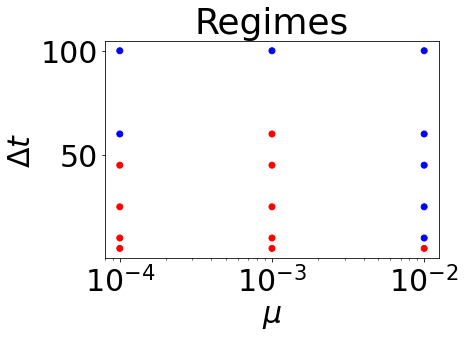

In [99]:
# Extract x and y coordinates from dictionary keys
x_values = [point[0] for point in regime.keys()]
y_values = [point[1] for point in regime.keys()]

# Extract binary values from dictionary values
binary_values = list(regime.values())

# Define colors based on binary values (0 for blue, 1 for red)
colors = ['blue' if value == 0 else 'red' for value in binary_values]

# Create scatter plot
plt.scatter(x_values, y_values, c=colors)

# Set labels and title
plt.xlabel(r'$\mu$')
plt.ylabel(r'$\Delta t$')
plt.xscale('log')
plt.title('Regimes')
plt.savefig('regimes.png', bbox_inches='tight')

In [100]:
import csv
import numpy as np

# Generate 100 points in logarithmic scale from 0.0001 to 0.01
x_values = np.logspace(np.log10(0.0001), np.log10(0.01), 10)

# Generate 100 points linearly spaced from 1 to 100
y_values = np.linspace(1, 100, 10)

# Generate all possible pairwise combinations
pairs = [(x, y) for x in x_values for y in y_values]

# Write pairs to a CSV file
with open('pairs.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['X', 'Y'])  # Write header
    writer.writerows(pairs)
    
print("CSV file created successfully.")


CSV file created successfully.


In [40]:
len(X)

10000

Integral: 2873.18090145348


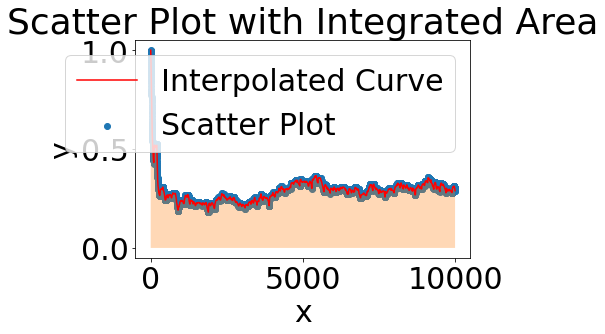

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.integrate import simps

# Generate some random data for the scatter plot
x = df.iloc[:, 0]
y = df.iloc[:, 2]

# Sort the data points based on x values for integration
sort_indices = np.argsort(x)
x_sorted = x[sort_indices]
y_sorted = y[sort_indices]

# Create an interpolation function
f = interp1d(x_sorted, y_sorted, kind='linear')

# Generate x values for plotting the interpolated curve
x_interp = np.linspace(min(x_sorted), max(x_sorted), 1000)

# Calculate the y values using the interpolation function
y_interp = f(x_interp)

# Plot the scatter plot
plt.scatter(x, y, label='Scatter Plot')

# Plot the interpolated curve
plt.plot(x_interp, y_interp, label='Interpolated Curve', color='red')

# Fill the area under the curve
plt.fill_between(x_interp, y_interp, alpha=0.3)

# Integrate under the curve
integral = simps(y_interp, x_interp)
print("Integral:", integral)

plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter Plot with Integrated Area')
plt.legend()
plt.show()


In [ ]:
import numpy as np
from scipy import interpolate, integrate

# Sample scatter plot data
x = np.array([1, 2, 3, 4, 5])
y = np.array([1.1, 2.2, 3.3, 4.4, 5.5])  # Means
error = np.array([0.1, 0.2, 0.15, 0.3, 0.25])  # Standard errors

# Perform interpolation
f = interpolate.interp1d(x, y, kind='cubic')

# Define uncertainty function based on standard errors
def uncertainty(x):
    # Find the nearest x value in the data
    idx = np.abs(x - x[:, None]).argmin(axis=1)
    # Return the corresponding standard error
    return error[idx]

# Perform numerical integration with uncertainty
integral, error_estimate = integrate.quad(lambda x: f(x) + uncertainty(x), x[0], x[-1])

print("Interpolated integral:", integral)
print("Estimated error on integral:", error_estimate)
